In [1]:
import numpy as np
import scipy as sp
from pandas import DataFrame, Series
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import os,time,datetime
from sklearn.preprocessing import MinMaxScaler
import pickle
%matplotlib inline

In [2]:
allstate_train = pd.read_csv('train.csv')
allstate_test = pd.read_csv('test.csv')

In [3]:
allstate_train.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [4]:
allstate_test.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
5,17,A,A,A,A,B,A,A,A,A,...,0.643315,0.407351,0.390540,0.46477,0.46853,0.50556,0.607500,0.594646,0.250991,0.283976
6,21,B,A,A,A,B,B,A,A,A,...,0.281143,0.960845,0.740081,0.75964,0.98330,0.82249,0.863052,0.879347,0.888944,0.787807
7,28,B,B,A,A,A,A,A,A,B,...,0.651246,0.451115,0.316313,0.27320,0.52100,0.50556,0.415029,0.481306,0.199940,0.450597
8,32,A,B,A,A,A,A,A,A,B,...,0.534484,0.343492,0.358758,0.81900,0.32128,0.36458,0.453334,0.443374,0.695650,0.295075
9,43,A,B,A,A,A,A,A,A,B,...,0.281143,0.394921,0.287416,0.92347,0.48320,0.24766,0.359572,0.352251,0.519989,0.602666


In [12]:
allstate_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [14]:
print allstate_train.shape
print allstate_test.shape

(188318, 132)
(125546, 131)


In [13]:
allstate_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [11]:
True in (allstate_train.isnull().sum(axis = 0) != 0)

False

In [6]:
# extract and save the ID of the train and test, since it is not useful for prediction.
ID_train = allstate_train['id']
ID_test = allstate_test['id']
allstate_test.drop('id', axis = 1, inplace= True)
allstate_train.drop('id', axis = 1, inplace= True)

# extract the loss column from the dataset as prediction values
Y_train = allstate_train['loss']
allstate_train.drop('loss', axis = 1, inplace= True)
X_train = allstate_train.copy()
X_test = allstate_test.copy()

# the column of the training set and test set
features = allstate_train.columns

In [7]:
features

Index([u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7', u'cat8',
       u'cat9', u'cat10',
       ...
       u'cont5', u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11',
       u'cont12', u'cont13', u'cont14'],
      dtype='object', length=130)

In [41]:
# the number of cat features and continuous features
cat_num = 116
cont_num = 14

In [9]:
X_train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


In [10]:
#select the first 1000 rows to test. The computer is running slow to run all of the dataset
X_plot = X_train.iloc[:1000,:]
Y_plot = Y_train.iloc[:1000]

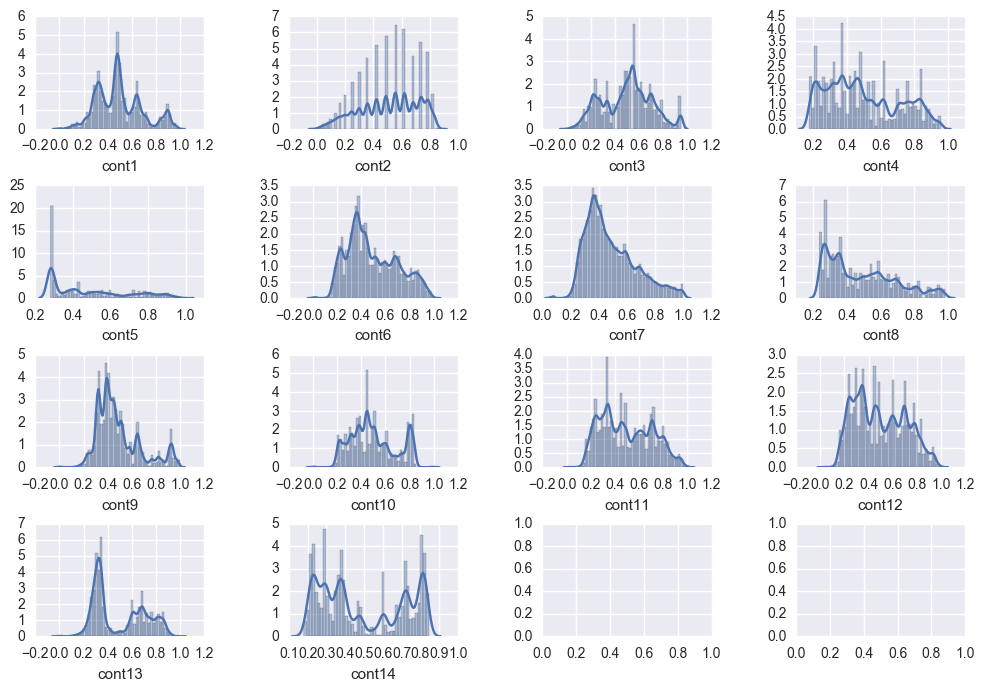

In [8]:
# Data Visulization
fig, axes = plt.subplots(4, 4, figsize = (12,8))
for row in range(4):
    for col in range(4):
        if (row == 3) & (col in [2,3]):
            break
        else:
            sns.distplot(X_train.iloc[:, row*4 + col - 14], axlabel= 'cont' + str(row*4 + col + 1), ax = axes[row, col] )
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

#sns.distplot(X_train['cont1'])

In [11]:
# correlation between each continuous feature:
X_cont_corr = X_train.iloc[:, -cont_num:].corr()  # correlation of the training set feature
X_cont_corr.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638


In [12]:
threshold = 0.5 # display the correlation which is higher than this value
corr_list = []
corr_index = []
for i in range(cont_num):
    for j in range(i + 1):
        if (i != j) & (X_cont_corr.iloc[i,j] >= threshold):
            corr_index.append('corr_cont_' + str(i+1) + '_'+str(j+1))
            corr_list.append(X_cont_corr.iloc[i,j])

corr_se = Series(corr_list, index= corr_index)            
corr_se.sort_values(ascending= False, inplace= True)
print(corr_se)

# you can use sklearn.decomposition.PCA or sklearn.decomposition.RandomizedPCA with whiten=True
# to further remove the linear correlation across features.

corr_cont_12_11    0.994384
corr_cont_9_1      0.929912
corr_cont_10_6     0.883351
corr_cont_13_6     0.815091
corr_cont_10_1     0.808551
corr_cont_9_6      0.797544
corr_cont_10_9     0.785697
corr_cont_12_6     0.785144
corr_cont_11_6     0.773745
corr_cont_6_1      0.758315
corr_cont_11_7     0.747108
corr_cont_12_7     0.742712
corr_cont_12_10    0.713812
corr_cont_13_10    0.707876
corr_cont_11_10    0.702896
corr_cont_7_6      0.658918
corr_cont_13_9     0.642028
corr_cont_12_9     0.626656
corr_cont_12_1     0.614225
corr_cont_11_9     0.608000
corr_cont_11_1     0.596090
corr_cont_13_1     0.534850
corr_cont_8_4      0.528740
dtype: float64


In [13]:
X_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,A,B,A,A,A,A,A,A,B,A,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,A,B,A,B,A,A,A,A,B,A,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,A,B,A,B,B,A,B,A,B,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,A,A,A,A,B,A,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,B,A,A,A,A,B,A,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [14]:
# convert cat columns to numeric 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

X_train.iloc[:, :cat_num] = X_train.iloc[:, :cat_num].apply(lambda x: enc.fit_transform(x))
X_test.iloc[:, :cat_num] = X_test.iloc[:, :cat_num].apply(lambda x: enc.fit_transform(x))

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), int64(116)
memory usage: 124.5 MB


In [14]:
# confirming all categorical variables to numeric 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), int64(116)
memory usage: 186.8 MB


In [16]:
X_test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [21]:
X_train.to_csv('X_train_Labelenc.csv', header= True, index= False)
Y_train.to_csv('Y_train_Labelenc.csv', header= True, index= False)
X_test.to_csv('X_test_Labelenc.csv', header= True, index= False)

In [42]:
# test one hot encoding for the dataset and calculate the execution time

start_time = time.time()

#rom sklearn.preprocessing import OneHotEncoder
#nehotenc = OneHotEncoder(categorical_features= 'all', sparse= False)

X_train_OHE = pd.get_dummies(allstate_train.iloc[:,:cat_num], sparse = False)

print("prediction time:{}s".format(round((time.time()-start_time), 3) ))
X_train_OHE.info()

prediction time:5.046s
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 1139 entries, cat1_A to cat116_Y
dtypes: float64(1139)
memory usage: 1.6 GB


In [48]:
X_train_OHE = pd.concat([X_train_OHE, X_train.iloc[:, -cont_num:]], axis= 1)
X_train_OHE.to_csv('X_train_OHE.csv', header= True, index= False)
#X_train_OHE.head(4)

In [14]:
# split the dataset into kfold 
from sklearn.cross_validation import KFold, cross_val_score

seed = 7
kfold = KFold(n = len(Y_train), n_folds = 3, random_state = seed)
# kfold = KFold(n = len(Y_train_small), n_folds = 3, random_state = seed)

In [15]:
# #minmax scaler
scaler= MinMaxScaler() 
X_train_scale = X_train.copy()
X_train_scale = scaler.fit_transform(X_train_scale)
X_train_scale = DataFrame(X_train_scale)
X_test_scale = DataFrame(scaler.fit_transform(X_test))

# MAE of random forest without data scaling: -1260.75
# MAE of random forest with data scaling: -1261.14
# prediction time:1442.151s

In [17]:
X_test_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.461064,0.266716,0.503285,0.345185,0.382078,0.355740,0.347099,0.712181,0.321194
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.791066,0.477148,0.402212,0.638701,0.521259,0.607057,0.679181,0.665353,0.458621,0.044243
2,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.623092,0.202772,0.275418,0.081376,0.345185,0.306830,0.218272,0.213741,0.261426,0.178108
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.165145,0.362879,0.293233,0.219058,0.333852,0.316388,0.325759,0.317983,0.599065,0.566438
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.030678,0.392267,0.346406,0.000000,0.439286,0.508111,0.336881,0.328781,0.304885,0.971496


In [22]:
X_train_small = X_train.iloc[:50000, :]
Y_train_small = Y_train.iloc[:50000]

# Single RandomForestRegressor

In [ ]:
# %%timeit
start_time = time.time()
from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators= 100)
score_rf_noscale = cross_val_score(clf_rf, X = X_train, y = Y_train, cv = kfold, scoring = 'mean_absolute_error')
score_rf_scale = cross_val_score(clf_rf, X = X_train_scale, y = Y_train, cv = kfold, scoring = 'mean_absolute_error')
#score_rf = cross_val_score(clf_rf, X = X_train_small, y = Y_train_small, cv = kfold,scoring = 'neg_mean_absolute_error')
print("MAE of random forest without data scaling: %.2f" % np.mean(score_rf_noscale))
print("MAE of random forest with data scaling: %.2f" % np.mean(score_rf_scale))
print("prediction time:{}s".format(round((time.time()-start_time), 3) ))

In [33]:
start_time = time.time()
clf_rf = RandomForestRegressor(n_estimators= 50)
clf_rf.fit(X_train, Y_train)
y_predict_rf = clf_rf.predict(X_test)
print("prediction time:{}s".format(round((time.time()-start_time), 3) ))

prediction time:432.54s


In [53]:
results_rf = pd.Series(y_predict_rf, name = 'loss')
results_rf = pd.concat([ID_test, results_rf], axis = 1)

In [60]:
results_rf.to_csv('submission_randomforest.csv', header = True, index= False)

# Test multiple regressor

In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import KFold, cross_val_score

In [6]:
RandomForestRegressor?

In [45]:
#  Test all the regressors on a small training set 

start_time = time.time()

seed = 7
kfold = KFold(n = len(Y_train_small), n_folds = 3, random_state = seed)

model = []
#model.append(('SGDReg', SGDRegressor(loss = 'epsilon_insensitive', penalty= 'l2')))
model.append(('LinearReg', LinearRegression()))
model.append(('RandForest', RandomForestRegressor(n_estimators= 50)))
model.append(('ExtraTree', ExtraTreesRegressor(n_estimators= 50)))
model.append(('Ridge', Ridge(random_state = seed)))
model.append(('Lasso', Lasso(random_state = seed)))
model.append(('ElasticNet', ElasticNet(random_state = seed)))
# model.append(('AdaBoost', AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state= 42)))     # Adaboost is not working good
# model.append(('SVR', SVR(kernel= 'rbf', C =100)))      # SVR is also not working good
 
MAE = []
names = []
for name, reg in model:
    score = cross_val_score(reg, X = X_train_small, y = Y_train_small, cv = kfold, scoring = 'mean_absolute_error')
    MAE.append([name, np.mean(score), np.std(score)])
    print('%s : MAE_mean is %.2f, MAE_std is %.2f' %(name, np.mean(score), np.std(score)))
        
MAE = DataFrame(MAE, columns= ['Regressor', 'MAE mean', 'MAE Std'])
print("prediction time:{}s".format(round((time.time()-start_time), 3) ))

#save it to txt file 
now = datetime.datetime.now()
now_str = str(now.month) + str(now.day) + str(now.hour) + str(now.minute)
filename =  'results\Models_trainingtest_' + now_str + '.txt'
np.savetxt(filename, MAE, fmt= ['%s', '%.2f', '%.2f'], header= 'regressor\tMAE_mean\tMAE_std')

LinearReg : MAE_mean is -1405.43, MAE_std is 27.85
RandForest : MAE_mean is -1362.99, MAE_std is 27.62
ExtraTree : MAE_mean is -1379.51, MAE_std is 18.80
Ridge : MAE_mean is -1386.21, MAE_std is 21.14
Lasso : MAE_mean is -1376.53, MAE_std is 21.18
ElasticNet : MAE_mean is -1428.01, MAE_std is 24.43
prediction time:21.427s


# Prediction by multiple models: 

In [47]:
start_time = time.time()
model = []
#model.append(('SGDReg', SGDRegressor(loss = 'epsilon_insensitive', penalty= 'l2')))
model.append(('LinearReg', LinearRegression()))
model.append(('RandForest', RandomForestRegressor(n_estimators= 100)))
model.append(('ExtraTree', ExtraTreesRegressor(n_estimators= 100)))
model.append(('Ridge', Ridge(random_state = seed)))
model.append(('Lasso', Lasso(random_state = seed)))
model.append(('ElasticNet', ElasticNet(random_state = seed)))

predic_result = []
predic_model_name = []
# predict using multiple models: 
for name, reg in model: 
    reg.fit(X_train, Y_train)
    predic_model_name.append(name)
    predic_result.append(reg.predict(X_test))

predic_result = DataFrame(np.transpose(predic_result), columns= predic_model_name)
predic_result['loss'] = predic_result.apply(lambda x: np.mean(x), axis = 1)
# predic_result['MAE'] = np.mean(abs(predic_result['mean']-Y_train_small))   # just test the multiple models
predic_result = pd.concat([ID_test, predic_result], axis= 1)
predic_result.to_csv('submission_multiple_models_moreestimators.csv', header = True, index= False)

print("prediction time:{}s".format(round((time.time()-start_time), 3) ))

prediction time:1435.713s


In [2]:
RandomForestRegressor?